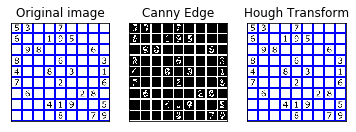

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('soduku.png')

#Convert image to grayscale
gray = cv2. cvtColor(img, cv2. COLOR_BGR2GRAY)

#Apply edge detection
edges = cv2.Canny(gray,50,150,apertureSize = 3)

#returns array of r and theta values
lines = cv2.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    r,theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a*r
    y0 = b*r
    
    #Store rounded off values
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    img2 = cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original image'),plt.xticks([]),plt.yticks([])

plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge'),plt.xticks([]),plt.yticks([])

plt.subplot(133),plt.imshow(img2,cmap = 'gray')
plt.title('Hough Transform'),plt.xticks([]),plt.yticks([])

plt.show()